<a href="https://colab.research.google.com/github/prosperjohn9/pca/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. Dimensions are nothing but features that represent the data. One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

Principal components are the key to PCA; they represent what's underneath the hood of your data, they have have both direction and magnitude.

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60000 images each of 32x32x3 color images having ten classes, with 6000 images per category.

The dataset consists of 50000 training images and 10000 test images.

The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

**Part 1**

Breast Cancer Data Exploration

In [ ]:
# Import necessary libraries for data handling, machine learning, and visualization
from sklearn.datasets import load_breast_cancer
from keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Breast Cancer dataset from sklearn and extract data
breast = load_breast_cancer()
breast_data = breast.data

# Display the shape of the dataset (number of samples, number of features)
breast_data.shape

(569, 30)

In [ ]:
# Load the labels (targets) for the Breast Cancer dataset and display their shape
breast_labels = breast.target
breast_labels.shape

(569,)

In [ ]:
# Reshape the labels for concatenation, concatenate with the data to form a complete dataset
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

'''

This code uses the NumPy library to concatenate two arrays, breast_data and labels, along the second axis (axis=1).
The resulting array, final_breast_data, will have the same number of rows as breast_data and an additional column for the labels data.
breast_data has shape (569, 30) and labels has shape (569, 1), then final_breast_data will have shape (569, 31).

'''

# Display the shape of the concatenated data (should show an additional column for labels)
final_breast_data.shape

(569, 31)

In [ ]:
# Convert the dataset into a Pandas DataFrame for easier manipulation
breast_dataset = pd.DataFrame(final_breast_data)

# Print the features of the breast cancer dataset
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# Add label to features
features_labels = np.append(features,'label')

# Embed column names to breast dataset
breast_dataset.columns = features_labels

# Print first few rows
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Change labels to Benign and Malignant
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

# Print last few rows
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


**Task 1 of Part 1: Data Visualization**

Visualizing the breast cancer data

In [ ]:
# Standardize the features to have a mean=0 and variance=1 for PCA application
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

x.shape

(569, 30)

In [ ]:
# Check if normalized data has a mean of zero and a standard deviation of one.
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [ ]:
# Convert the normalized features into a tabular format with the help of DataFrame.
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [ ]:
# Two-dimensional principal components
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

# Create a DataFrame that will have the principal component values for all 569 samples.
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [ ]:
# Find the explained_variance_ratio
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

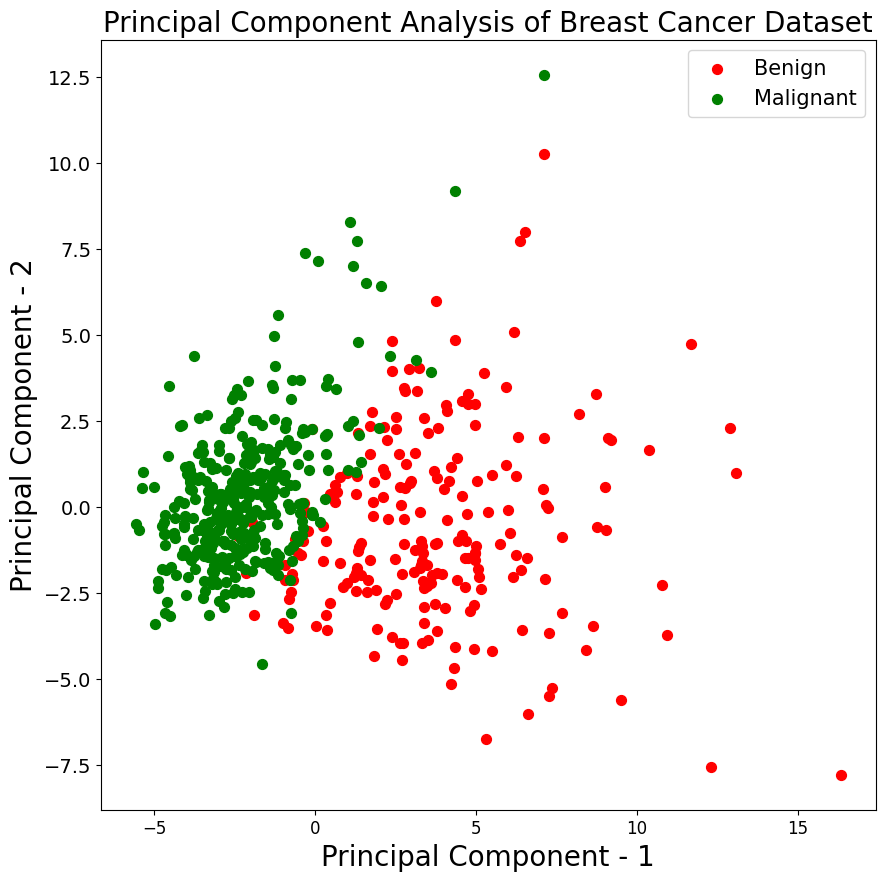

In [ ]:
# Plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

CIFAR - 10 Data Exploration

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display shapes of the training and testing datasets
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
# Print shape of label
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


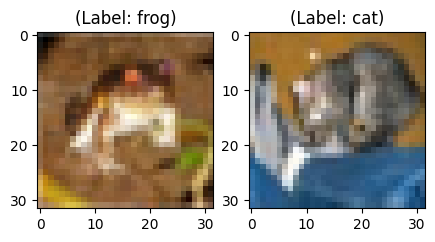

In [ ]:
# Dictionary with class names and labels
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

Visualizing the CIFAR - 10 data

In [ ]:
# Check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive
np.min(x_train),np.max(x_train)

# Normalize the pixel values of images to [0,1]
x_train = x_train/255.0
np.min(x_train),np.max(x_train)

x_train.shape

(50000, 32, 32, 3)

In [ ]:
# Reshape the image dimensions from three to one (flatten the images)
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

# Create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [ ]:
# Print first few rows
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [ ]:
# Create the PCA method and pass the number of components as two and apply fit_transform on the training data
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

# Convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

# Print first few rows
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [ ]:
# Find out the amount of information or variance the principal components hold
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

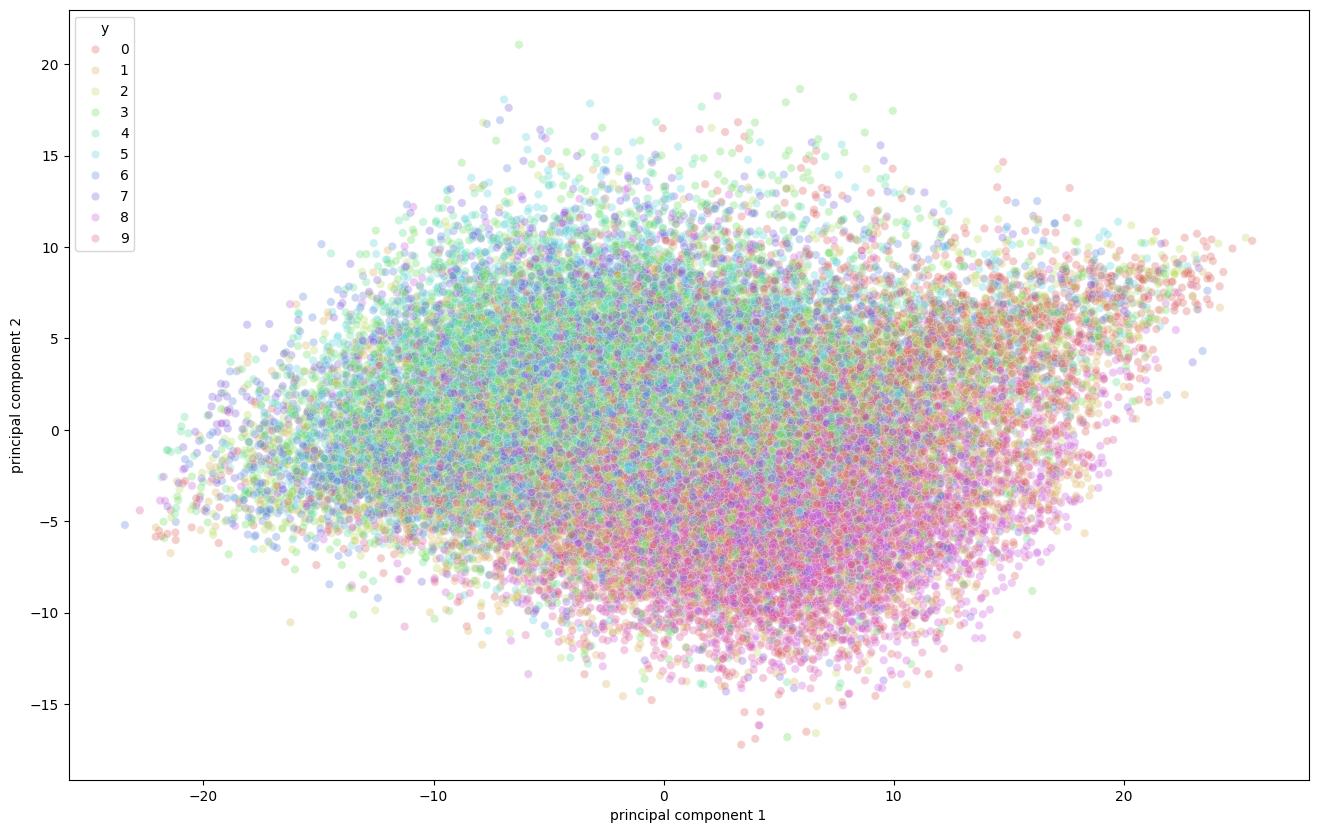

In [ ]:
# Plot the visualization
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

**Task 2 of Part 1 : Speeding Up a Machine Learning (ML) Algorithm**

In [ ]:
# Import necessary libraries
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import time

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize testing image
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)

# Reshape test data
x_test_flat = x_test.reshape(-1,3072)

# PCA of 90%
pca = PCA(0.9)

# Fit PCA on training images
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Find out how many components PCA used for 90% variance
pca.n_components_

99

In [ ]:
# Apply transform on both the training and test set to generate a transformed dataset from the parameters generated from the fit method
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

# Convert training and testing labels to one-hot encoding vector
y_train = to_categorical(y_train, 10) # 10 is the number of classes
y_test = to_categorical(y_test, 10)

# Define the number of epochs, number of classes, and the batch size
batch_size = 128
num_classes = 10
epochs = 20

# Define a neural network model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,))) # Ensure the input shape matches PCA components
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Print model summary to check architecture and parameters
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 1024)              102400    
                                                                 
 dense_76 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_77 (Dense)            (None, 512)               524800    
                                                                 
 dense_78 (Dense)            (None, 256)               131328    
                                                                 
 dense_79 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1810698 (6.91 MB)
Trainable params: 1810698 (6.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Start timing
start_time = time.time()

# Train the model on PCA-transformed data
history = model.fit(train_img_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(test_img_pca, y_test))

# Calculate training time
end_time = time.time()
training_time = end_time - start_time

# Extract the accuracy from the history object
final_accuracy = history.history['accuracy'][-1] * 100  # Last epoch accuracy
final_val_accuracy = history.history['val_accuracy'][-1] * 100  # Last epoch validation accuracy

# Print the results
print(f"Training completed in: {training_time:.2f} seconds")
print(f"Final training accuracy: {final_accuracy:.2f}%")
print(f"Final validation accuracy: {final_val_accuracy:.2f}%")

Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 1.6294 - accuracy: 0.4194 - val_loss: 1.4608 - val_accuracy: 0.4850
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3260 - accuracy: 0.5327 - val_loss: 1.3941 - val_accuracy: 0.5097
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1452 - accuracy: 0.5933 - val_loss: 1.2884 - val_accuracy: 0.5391
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9872 - accuracy: 0.6482 - val_loss: 1.3200 - val_accuracy: 0.5457
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8303 - accuracy: 0.7036 - val_loss: 1.4001 - val_accuracy: 0.5576
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.6737 - accuracy: 0.7574 - val_loss: 1.4794 - val_accuracy: 0.5594
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.5289 - accuracy: 0.8131 - val_loss: 1.5791 - val_accuracy: 0.5587

In [ ]:
# Time the model takes to train on the original dataset
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Start timing
start_time = time.time()

# Train the model on PCA-transformed data
history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

# Calculate training time
end_time = time.time()
training_time = end_time - start_time

# Extract the accuracy from the history object
final_accuracy = history.history['accuracy'][-1] * 100  # Last epoch accuracy
final_val_accuracy = history.history['val_accuracy'][-1] * 100  # Last epoch validation accuracy

# Print the results
print(f"Training completed in: {training_time:.2f} seconds")
print(f"Final training accuracy: {final_accuracy:.2f}%")
print(f"Final validation accuracy: {final_val_accuracy:.2f}%")

Epoch 1/20
391/391 [==============================] - 8s 19ms/step - loss: 2.1074 - accuracy: 0.2458 - val_loss: 1.9237 - val_accuracy: 0.2886
Epoch 2/20
391/391 [==============================] - 7s 19ms/step - loss: 1.8283 - accuracy: 0.3401 - val_loss: 1.8148 - val_accuracy: 0.3541
Epoch 3/20
391/391 [==============================] - 7s 19ms/step - loss: 1.7295 - accuracy: 0.3790 - val_loss: 1.7034 - val_accuracy: 0.3938
Epoch 4/20
391/391 [==============================] - 7s 19ms/step - loss: 1.6587 - accuracy: 0.4027 - val_loss: 1.6086 - val_accuracy: 0.4255
Epoch 5/20
391/391 [==============================] - 7s 19ms/step - loss: 1.6004 - accuracy: 0.4271 - val_loss: 1.6060 - val_accuracy: 0.4215
Epoch 6/20
391/391 [==============================] - 7s 19ms/step - loss: 1.5488 - accuracy: 0.4433 - val_loss: 1.5575 - val_accuracy: 0.4474
Epoch 7/20
391/391 [==============================] - 7s 19ms/step - loss: 1.5097 - accuracy: 0.4599 - val_loss: 1.5262 - val_accuracy: 0.4575

By applying PCA on the training data you were able to train your deep learning algorithm not only fast, but it also achieved better accuracy on the testing data when compared with the deep learning algorithm trained with original training data.

**PART 2**

**Task 1 of Part 2: Modify your code**

**Case 1: Number of components will be set to 2**

Breast Cancer Dataset - Explained variance for 2 components: [0.44272026 0.18971182]


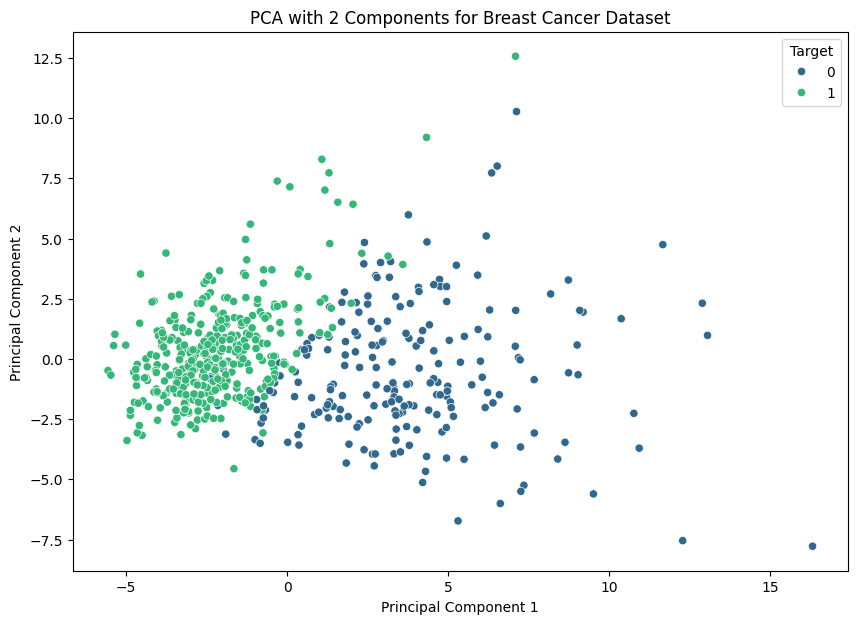

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_breast_cancer
from keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load and prepare the Breast Cancer dataset
breast = load_breast_cancer()
x_breast = StandardScaler().fit_transform(breast.data)  # Standardizing the data

# PCA for Breast Cancer dataset with 2 components
pca_breast_2 = PCA(n_components=2)
principalComponents_breast_2 = pca_breast_2.fit_transform(x)
explained_variance_breast_2 = pca_breast_2.explained_variance_ratio_
print('Breast Cancer Dataset - Explained variance for 2 components:', explained_variance_breast_2)

# Create a DataFrame for visualization
principal_breast_Df_2 = pd.DataFrame(data = principalComponents_breast_2, columns = ['Principal Component 1', 'Principal Component 2'])
principal_breast_Df_2['Target'] = breast.target

# Visualization for Breast Cancer dataset
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=principal_breast_Df_2, palette='viridis')
plt.title('PCA with 2 Components for Breast Cancer Dataset')
plt.show()

CIFAR-10 Dataset - Explained variance for 2 components: [0.2907663  0.11253144]


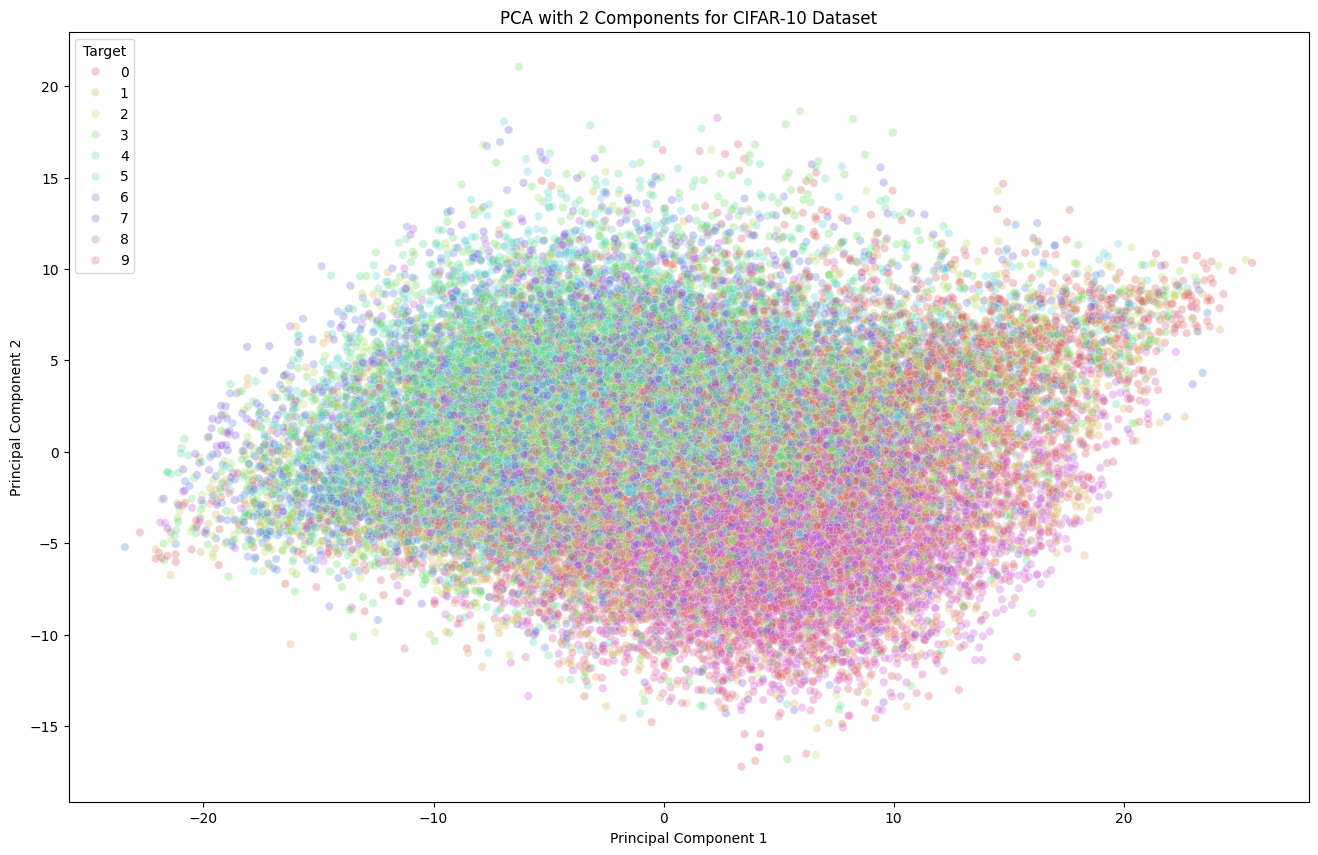

In [ ]:
# Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_flat = x_train.reshape(-1, 3072) / 255.0  # Flatten and normalize
x_test_flat = x_test.reshape(-1, 3072) / 255.0  # Flatten and normalize

# Encode the labels for CIFAR-10
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# PCA for CIFAR-10 dataset with 2 components
pca_cifar_2 = PCA(n_components=2)
principalComponents_cifar_2 = pca_cifar_2.fit_transform(x_train_flat)
explained_variance_cifar_2 = pca_cifar_2.explained_variance_ratio_
print('CIFAR-10 Dataset - Explained variance for 2 components:', explained_variance_cifar_2)

# Create a DataFrame for visualization
principal_cifar_Df_2 = pd.DataFrame(data = principalComponents_cifar_2, columns = ['Principal Component 1', 'Principal Component 2'])
principal_cifar_Df_2['Target'] = y_train.flatten()

# Visualization for CIFAR-10 dataset
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=principal_cifar_Df_2, palette=sns.color_palette("hls", 10), legend="full", alpha=0.3)
plt.title('PCA with 2 Components for CIFAR-10 Dataset')
plt.show()

**Case 2: Number of components will be set to 3**

Breast Cancer Dataset - Explained variance for 3 components: [0.44272026 0.18971182 0.09393163]


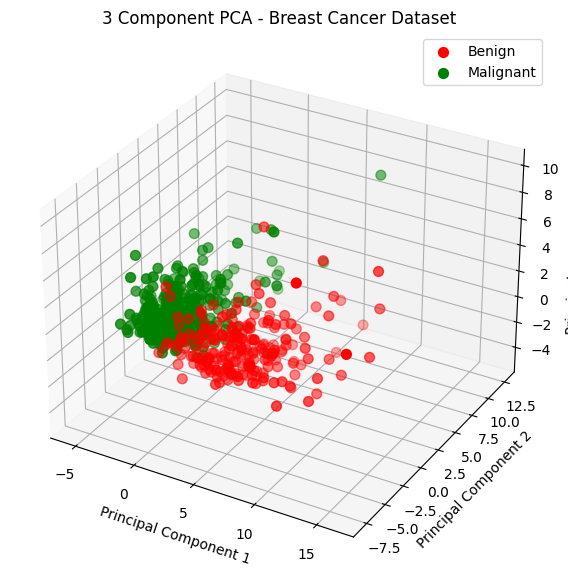

In [ ]:
# PCA with 3 components for the Breast Cancer dataset
pca_breast_3 = PCA(n_components=3)
principalComponents_breast_3 = pca_breast_3.fit_transform(x)
explained_variance_breast_3 = pca_breast_3.explained_variance_ratio_
print('Breast Cancer Dataset - Explained variance for 3 components:', explained_variance_breast_3)

# Creating a DataFrame for 3D visualization
principal_breast_Df_3 = pd.DataFrame(data = principalComponents_breast_3, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
principal_breast_Df_3['Target'] = breast.target

# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
targets = [0, 1]  # Assuming 0 for benign, 1 for malignant
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = principal_breast_Df_3['Target'] == target
    ax.scatter(principal_breast_Df_3.loc[indicesToKeep, 'Principal Component 1'],
               principal_breast_Df_3.loc[indicesToKeep, 'Principal Component 2'],
               principal_breast_Df_3.loc[indicesToKeep, 'Principal Component 3'], c = color, s = 50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(['Benign', 'Malignant'])
ax.set_title('3 Component PCA - Breast Cancer Dataset')
plt.show()

CIFAR-10 Dataset - Explained variance for 3 components: [0.2907663  0.11253144 0.06694414]


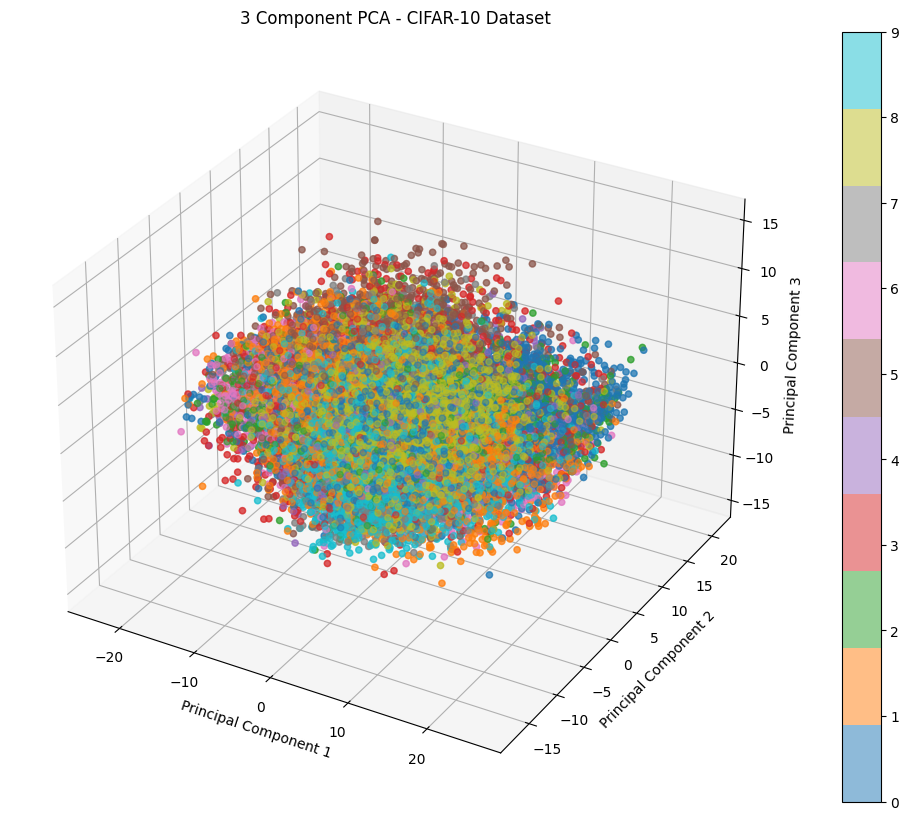

In [ ]:
# PCA with 3 components for the CIFAR-10 dataset
pca_cifar_3 = PCA(n_components=3)
principalComponents_cifar_3 = pca_cifar_3.fit_transform(x_train_flat)
explained_variance_cifar_3 = pca_cifar_3.explained_variance_ratio_
print('CIFAR-10 Dataset - Explained variance for 3 components:', explained_variance_cifar_3)

# Creating a DataFrame for 3D visualization
principal_cifar_Df_3 = pd.DataFrame(data = principalComponents_cifar_3, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
principal_cifar_Df_3['Target'] = y_train.flatten()

# 3D Visualization
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
targets = np.unique(y_train)  # Unique classes in CIFAR-10
# Using a colormap to plot different classes
cm = plt.get_cmap('tab10')
ax.scatter(principal_cifar_Df_3['Principal Component 1'], principal_cifar_Df_3['Principal Component 2'], principal_cifar_Df_3['Principal Component 3'], c=principal_cifar_Df_3['Target'], cmap=cm, alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3 Component PCA - CIFAR-10 Dataset')
plt.colorbar(ax.scatter(principal_cifar_Df_3['Principal Component 1'], principal_cifar_Df_3['Principal Component 2'], principal_cifar_Df_3['Principal Component 3'], c=principal_cifar_Df_3['Target'], cmap=cm, alpha=0.5))
plt.show()

**Case 3: Number of components will be set to 4**

For Case 3, we'll apply PCA with 4 components to both the Breast Cancer dataset and the CIFAR-10 dataset. After performing PCA, instead of attempting direct visualization, we'll focus on analyzing the explained variance ratio of the principal components. Visualization beyond 3 dimensions (3D) is not straightforward because our natural ability to perceive space is limited to three dimensions. While we can easily interpret plots in 2D or 3D, there's no simple way to visualize higher-dimensional spaces (4D and beyond) in a manner that's intuitively understandable. Therefore, for PCA components greater than 3, we typically rely on numerical analyses like the explained variance ratio to understand the importance and contribution of each principal component to the variance in the data. However for the purpose of this exercise I will be carrying out the visualization of the data with parallel coordinates

Breast Cancer Dataset - Explained variance for 4 components: [0.44272026 0.18971182 0.09393163 0.06602135]


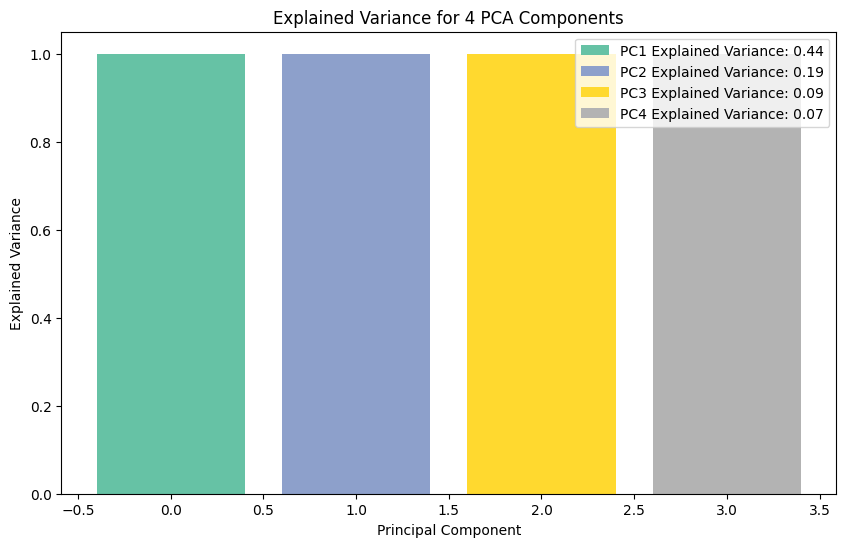

In [ ]:
# PCA with 4 components for the Breast Cancer dataset
pca_breast_4 = PCA(n_components=4)
principalComponents_breast_4 = pca_breast_4.fit_transform(x)
explained_variance_breast_4 = pca_breast_4.explained_variance_ratio_

# Print the explained variance
print('Breast Cancer Dataset - Explained variance for 4 components:', explained_variance_breast_4)

# Convert explained variance to colors using a color map
colors = plt.cm.get_cmap('Set2', len(explained_variance_breast_4))(np.arange(len(explained_variance_breast_4)))

# Plotting the color map
plt.figure(figsize=(10, 6))
for i, (variance, color) in enumerate(zip(explained_variance_breast_4, colors)):
    plt.bar(i, 1, color=color, label=f'PC{i+1} Explained Variance: {variance:.2f}')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for 4 PCA Components')
plt.legend()
plt.show()


CIFAR-10 Dataset - Explained variance for 4 components: [0.2907663  0.11253144 0.06694414 0.03676459]


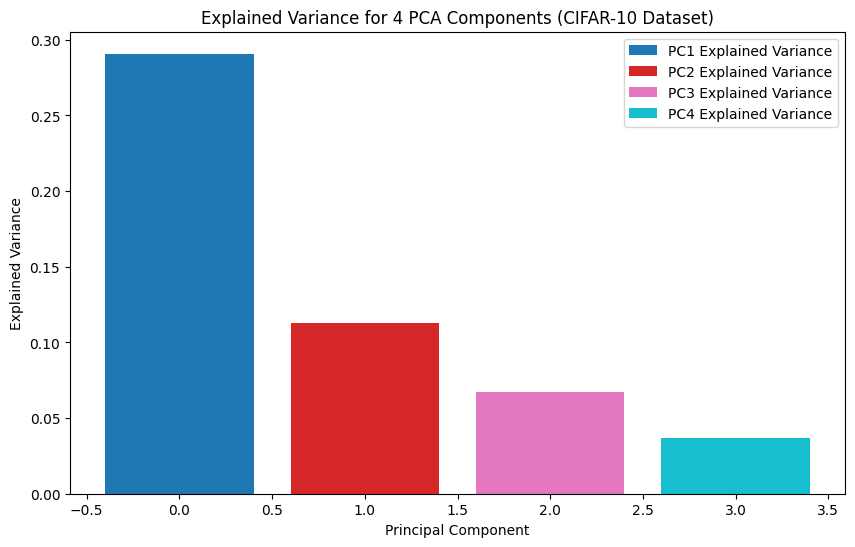

In [ ]:
# PCA with 4 components for the CIFAR-10 dataset
pca_cifar_4 = PCA(n_components=4)
principalComponents_cifar_4 = pca_cifar_4.fit_transform(x_train_flat)
explained_variance_cifar_4 = pca_cifar_4.explained_variance_ratio_

# Print the explained variance
print('CIFAR-10 Dataset - Explained variance for 4 components:', explained_variance_cifar_4)

# Convert explained variance to colors using a color map
colors = plt.cm.get_cmap('tab10', len(explained_variance_cifar_4))(np.arange(len(explained_variance_cifar_4)))

# Plotting the color map
plt.figure(figsize=(10, 6))
for i, (variance, color) in enumerate(zip(explained_variance_cifar_4, colors)):
    plt.bar(i, variance, color=color, label=f'PC{i+1} Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for 4 PCA Components (CIFAR-10 Dataset)')
plt.legend()
plt.show()

**Case 4: Number of components will be set to 5**

Breast Cancer Dataset - Explained variance for 5 components: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


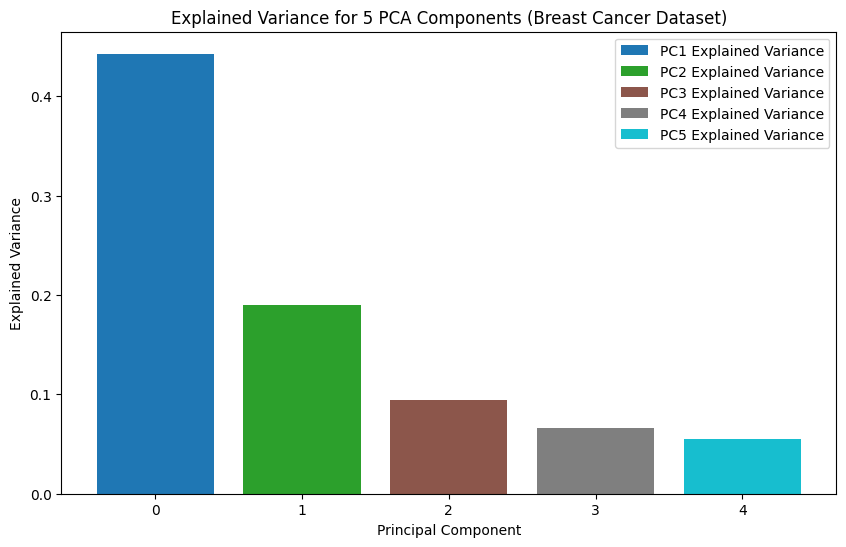

In [ ]:
# Applying PCA with 5 components for the Breast Cancer dataset
pca_breast_5 = PCA(n_components=5)
principalComponents_breast_5 = pca_breast_5.fit_transform(x)
explained_variance_breast_5 = pca_breast_5.explained_variance_ratio_

# Print the explained variance
print('Breast Cancer Dataset - Explained variance for 5 components:', explained_variance_breast_5)

# Convert explained variance to colors using a color map
colors = plt.cm.get_cmap('tab10', len(explained_variance_breast_5))(np.arange(len(explained_variance_breast_5)))

# Plotting the color map for explained variance
plt.figure(figsize=(10, 6))
for i, (variance, color) in enumerate(zip(explained_variance_breast_5, colors)):
    plt.bar(i, variance, color=color, label=f'PC{i + 1} Explained Variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for 5 PCA Components (Breast Cancer Dataset)')
plt.legend()
plt.show()


CIFAR-10 Dataset - Explained variance for 5 components: [0.2907663  0.11253144 0.06694414 0.03676459 0.03608843]


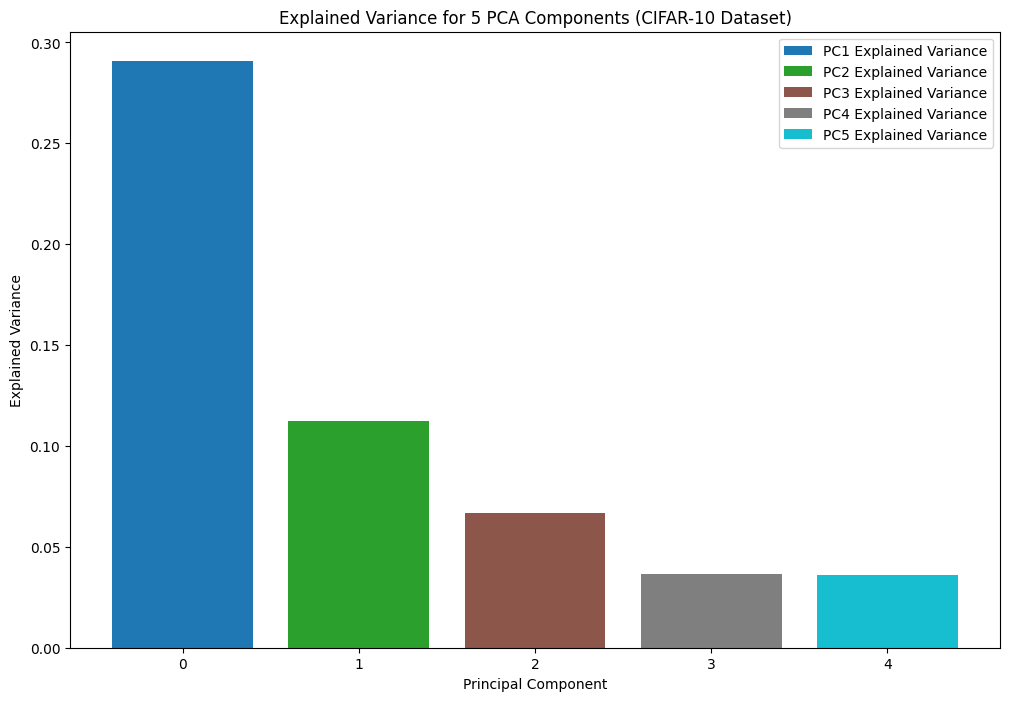

In [ ]:
# Applying PCA with 5 components for the CIFAR-10 dataset
pca_cifar_5 = PCA(n_components=5)
principalComponents_cifar_5 = pca_cifar_5.fit_transform(x_train_flat)
explained_variance_cifar_5 = pca_cifar_5.explained_variance_ratio_

# Print the explained variance
print('CIFAR-10 Dataset - Explained variance for 5 components:', explained_variance_cifar_5)

# Convert explained variance to colors using a color map
colors = plt.cm.get_cmap('tab10', len(explained_variance_cifar_5))(np.arange(len(explained_variance_cifar_5)))

# Plotting the color map for explained variance
plt.figure(figsize=(12, 8))
for i, (variance, color) in enumerate(zip(explained_variance_cifar_5, colors)):
    plt.bar(i, variance, color=color, label=f'PC{i + 1} Explained Variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for 5 PCA Components (CIFAR-10 Dataset)')
plt.legend()
plt.show()

**Task 2 of Part 2**

In [ ]:
# Define a function for plotting explained variance ratio
def plot_explained_variance_ratio(pca, title):

    """

    This function plots the explained variance ratio of each principal component.

    Parameters:
    - pca: Fitted PCA object
    - title: Title for the plot

    """
    n_components = len(pca.explained_variance_ratio_)
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.6, color='blue', label='Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.xticks(range(1, n_components + 1))
    plt.title(title)
    plt.legend()
    plt.show()

Breast Cancer Dataset - Explained variance for 5 components: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


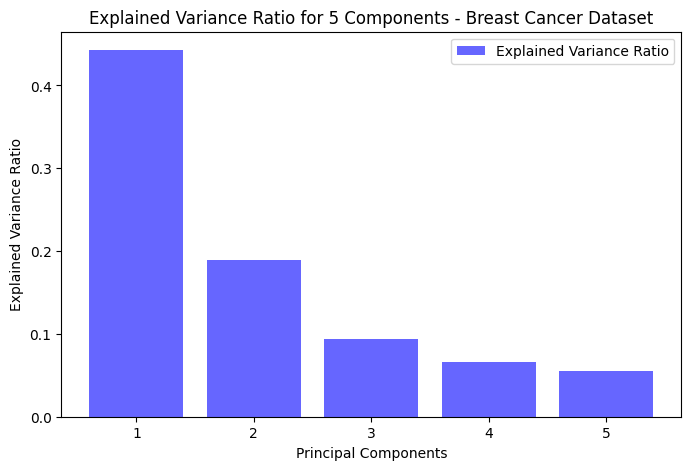

In [ ]:
# Print
print('Breast Cancer Dataset - Explained variance for 5 components:', explained_variance_breast_5)

# Plotting for the Breast Cancer dataset
plot_explained_variance_ratio(pca_breast_5, 'Explained Variance Ratio for 5 Components - Breast Cancer Dataset')

CIFAR-10 Dataset - Explained variance for 5 components: [0.2907663  0.11253144 0.06694414 0.03676459 0.03608843]


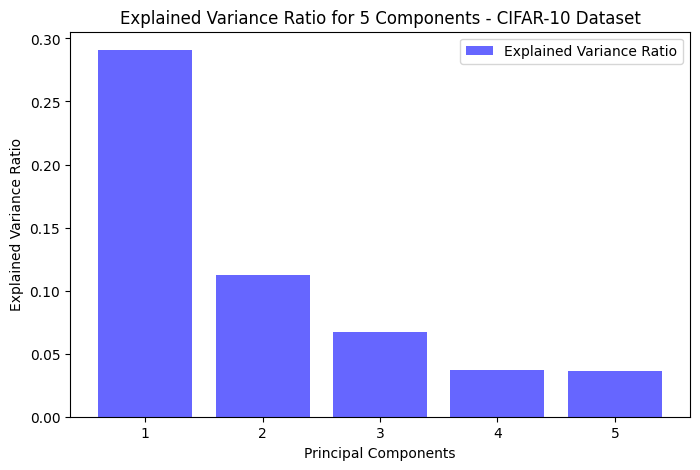

In [ ]:
# Print
print('CIFAR-10 Dataset - Explained variance for 5 components:', explained_variance_cifar_5)

# Plotting for the CIFAR-10 dataset
plot_explained_variance_ratio(pca_cifar_5, 'Explained Variance Ratio for 5 Components - CIFAR-10 Dataset')

In [ ]:
# Function for Plotting Explained Variance and Information Loss
def plot_information_loss(pca_objects, dataset_title):

    """

    This function prints and plots the cumulative explained variance and information loss for a range of PCA components.

    Parameters:
    - pca_objects: List of fitted PCA objects
    - dataset_title: Title for the dataset

    """
    # Extracting cumulative explained variance for each PCA object and calculating information loss
    cumulative_explained_variance = [sum(pca.explained_variance_ratio_) for pca in pca_objects]
    information_loss = [1 - x for x in cumulative_explained_variance]
    components = [pca.n_components for pca in pca_objects]

    # Print the percentages
    print(f"Cumulative Explained Variance for {dataset_title}:")
    for component, variance in zip(components, cumulative_explained_variance):
        print(f"Components: {component}, Cumulative Explained Variance: {variance*100:.2f}%")

    print(f"\nInformation Loss for {dataset_title}:")
    for component, loss in zip(components, information_loss):
        print(f"Components: {component}, Information Loss: {loss*100:.2f}%")

    # Plotting Bar chart for information loss
    plt.figure(figsize=(10, 6))
    plt.bar(components, information_loss, color='orange', label='Information Loss')
    plt.xlabel('Number of Components')
    plt.ylabel('Information Loss')
    plt.title(f'Information Loss across Different PCA Components - {dataset_title}')
    plt.xticks(components)
    plt.legend()
    plt.show()

Cumulative Explained Variance for Breast Cancer Dataset:
Components: 2, Cumulative Explained Variance: 63.24%
Components: 3, Cumulative Explained Variance: 72.64%
Components: 4, Cumulative Explained Variance: 79.24%
Components: 5, Cumulative Explained Variance: 84.73%

Information Loss for Breast Cancer Dataset:
Components: 2, Information Loss: 36.76%
Components: 3, Information Loss: 27.36%
Components: 4, Information Loss: 20.76%
Components: 5, Information Loss: 15.27%


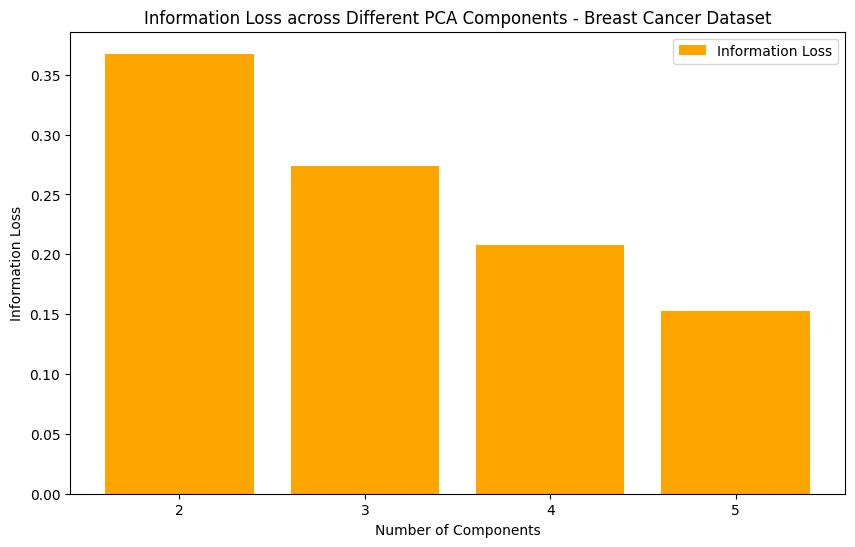

In [ ]:
# List of PCA objects for the Breast Cancer dataset
pca_breast_objects = [pca_breast_2, pca_breast_3, pca_breast_4, pca_breast_5]

# Plotting information loss for the Breast Cancer dataset
plot_information_loss(pca_breast_objects, 'Breast Cancer Dataset')

Cumulative Explained Variance for CIFAR-10 Dataset:
Components: 2, Cumulative Explained Variance: 40.33%
Components: 3, Cumulative Explained Variance: 47.02%
Components: 4, Cumulative Explained Variance: 50.70%
Components: 5, Cumulative Explained Variance: 54.31%

Information Loss for CIFAR-10 Dataset:
Components: 2, Information Loss: 59.67%
Components: 3, Information Loss: 52.98%
Components: 4, Information Loss: 49.30%
Components: 5, Information Loss: 45.69%


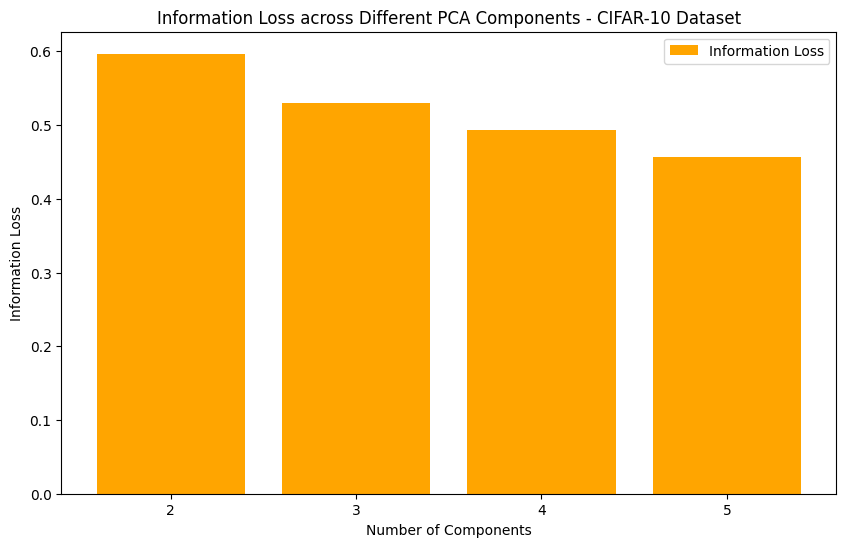

In [ ]:
# List of PCA objects for the CIFAR-10 dataset
pca_cifar_objects = [pca_cifar_2, pca_cifar_3, pca_cifar_4, pca_cifar_5]

# Plotting information loss for the CIFAR-10 dataset
plot_information_loss(pca_cifar_objects, 'CIFAR-10 Dataset')

**Task 3 of Part 2: Modify your code**

**Case 1: PCA will hold 90% of the variance**

In [ ]:
# Import necessary libraries
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

# Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_flat = x_train.reshape(-1, 3072) / 255.0  # Flatten and normalize
x_test_flat = x_test.reshape(-1, 3072) / 255.0  # Flatten and normalize

# Encode the labels for CIFAR-10
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Apply PCA to retain 90% of the variance
pca_90 = PCA(n_components=0.9)
pca_90.fit(x_train_flat)
x_train_pca_90 = pca_90.transform(x_train_flat)
x_test_pca_90 = pca_90.transform(x_test_flat)
n_components_90 = pca_90.n_components_

print(f"Number of components for 90% variance retention: {n_components_90}")

Number of components for 90% variance retention: 99


**Case 2: PCA will hold 80% of the variance**

In [ ]:
# Apply PCA to retain 80% of the variance
pca_80 = PCA(n_components=0.8)
pca_80.fit(x_train_flat)

# Number of components to retain 80% variance
print(f"Number of components for 80% variance retention: {pca_80.n_components_}")

Number of components for 80% variance retention: 33


**Case 3: PCA will hold 70% of the variance**

In [ ]:
# Apply PCA to retain 70% of the variance
pca_70 = PCA(n_components=0.7)
pca_70.fit(x_train_flat)

# Number of components to retain 70% variance
print(f"Number of components for 70% variance retention: {pca_70.n_components_}")

Number of components for 70% variance retention: 15


**Case 4: PCA will hold 60% of the variance**

In [ ]:
# Apply PCA to retain 60% of the variance
pca_60 = PCA(n_components=0.6)
pca_60.fit(x_train_flat)

# Number of components to retain 60% variance
print(f"Number of components for 60% variance retention: {pca_60.n_components_}")

Number of components for 60% variance retention: 8


**Case 5: PCA will hold 50% of the variance**

In [ ]:
# Apply PCA to retain 90% of the variance
pca_50 = PCA(n_components=0.5)
pca_50.fit(x_train_flat)

# Number of components to retain 50% variance
print(f"Number of components for 50% variance retention: {pca_50.n_components_}")

Number of components for 50% variance retention: 4


Variance level: 90.0%, Components required: 99
Variance level: 80.0%, Components required: 33
Variance level: 70.0%, Components required: 15
Variance level: 60.0%, Components required: 8
Variance level: 50.0%, Components required: 4


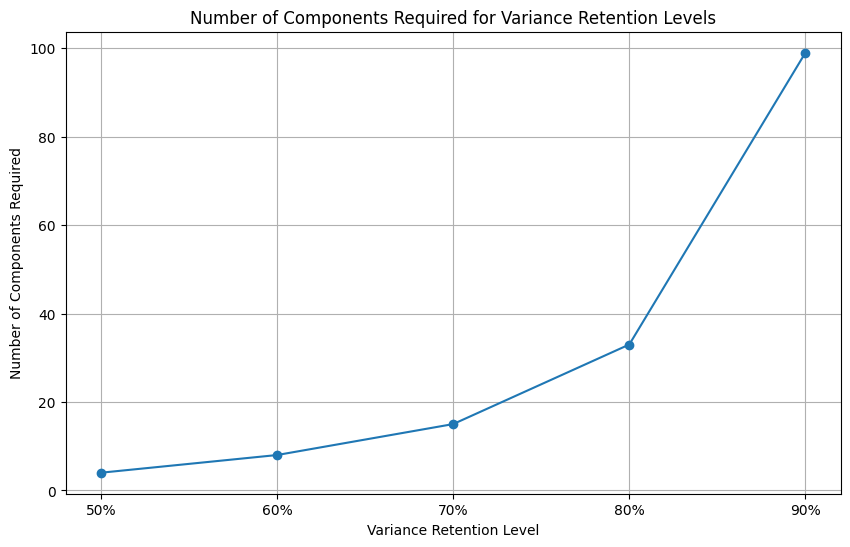

In [ ]:
# Visualizing All Cases Together
variance_levels = [0.9, 0.8, 0.7, 0.6, 0.5]
components_required = [pca_90.n_components_, pca_80.n_components_, pca_70.n_components_, pca_60.n_components_, pca_50.n_components_]

# Print the number of components for each variance level
for variance, components in zip(variance_levels, components_required):
    print(f"Variance level: {variance*100}%, Components required: {components}")

plt.figure(figsize=(10, 6))
plt.plot(variance_levels, components_required, '-o')
plt.title('Number of Components Required for Variance Retention Levels')
plt.xlabel('Variance Retention Level')
plt.ylabel('Number of Components Required')
plt.xticks(variance_levels, ['90%', '80%', '70%', '60%', '50%'])
plt.grid(True)
plt.show()

In [ ]:
# Flatten the images
x_train_flat = x_train.reshape(-1, 3072)
x_test_flat = x_test.reshape(-1, 3072)

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Function to Apply PCA, Train and Evaluate Model
def train_eval_model_with_pca(variance, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded, epochs=20, batch_size=128):
    # Apply PCA
    pca = PCA(n_components=variance)
    x_train_pca = pca.fit_transform(x_train_flat)
    x_test_pca = pca.transform(x_test_flat)

    # Log the number of components
    print(f"Variance: {variance*100}%, Components: {pca.n_components_}")

    # Define and compile the Sequential model
    model = Sequential([
        Dense(1024, activation='relu', input_shape=(pca.n_components_,)),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Start timing
    start_time = time.time()

    # Train the model
    history = model.fit(x_train_pca, y_train_encoded, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_test_pca, y_test_encoded), verbose=1)

    # Calculate training time
    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate the model's performance
    _, train_acc = model.evaluate(x_train_pca, y_train_encoded, verbose=0)
    _, test_acc = model.evaluate(x_test_pca, y_test_encoded, verbose=0)

    # Print the final test accuracy
    print(f"Final Training Accuracy: {train_acc*100:.2f}%, Final Test Accuracy: {test_acc*100:.2f}%\n")

    # Print the training time
    print(f"Training completed in: {training_time:.2f} seconds")

    # Return the final test accuracy
    return test_acc

In [ ]:
# Case 1: PCA will hold 90% of the variance
test_accuracy_90 = train_eval_model_with_pca(0.9, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)

Variance: 90.0%, Components: 99
Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 9.3187 - accuracy: 0.2725 - val_loss: 1.7886 - val_accuracy: 0.3713
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6415 - accuracy: 0.4206 - val_loss: 1.5840 - val_accuracy: 0.4319
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.4678 - accuracy: 0.4797 - val_loss: 1.5488 - val_accuracy: 0.4491
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3633 - accuracy: 0.5222 - val_loss: 1.4685 - val_accuracy: 0.4783
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.2662 - accuracy: 0.5557 - val_loss: 1.4614 - val_accuracy: 0.5026
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1849 - accuracy: 0.5837 - val_loss: 1.4387 - val_accuracy: 0.5189
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1283 - accuracy: 0.6049 - val_los

In [ ]:
#Case 2: PCA will hold 80% of the variance
test_accuracy_80 = train_eval_model_with_pca(0.8, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)

Variance: 80.0%, Components: 33
Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 9.3130 - accuracy: 0.2817 - val_loss: 1.7637 - val_accuracy: 0.3584
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6686 - accuracy: 0.4055 - val_loss: 1.5971 - val_accuracy: 0.4309
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5481 - accuracy: 0.4521 - val_loss: 1.5734 - val_accuracy: 0.4424
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.4842 - accuracy: 0.4761 - val_loss: 1.5495 - val_accuracy: 0.4583
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.4340 - accuracy: 0.4941 - val_loss: 1.6495 - val_accuracy: 0.4663
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3969 - accuracy: 0.5084 - val_loss: 1.5712 - val_accuracy: 0.4668
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3635 - accuracy: 0.5220 - val_los

In [ ]:
#Case 3: PCA will hold 70% of the variance
test_accuracy_70 = train_eval_model_with_pca(0.7, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)

Variance: 70.0%, Components: 15
Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 8.4340 - accuracy: 0.2786 - val_loss: 1.8844 - val_accuracy: 0.3477
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.7997 - accuracy: 0.3603 - val_loss: 1.7667 - val_accuracy: 0.3756
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.7295 - accuracy: 0.3860 - val_loss: 1.7241 - val_accuracy: 0.3930
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6955 - accuracy: 0.4011 - val_loss: 1.7498 - val_accuracy: 0.3860
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6772 - accuracy: 0.4073 - val_loss: 1.7535 - val_accuracy: 0.3965
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6589 - accuracy: 0.4154 - val_loss: 1.6984 - val_accuracy: 0.3999
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6451 - accuracy: 0.4203 - val_los

In [ ]:
# Case 4: PCA will hold 60% of the variance
test_accuracy_60 = train_eval_model_with_pca(0.6, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)

Variance: 60.0%, Components: 8
Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 8.0500 - accuracy: 0.2518 - val_loss: 1.9474 - val_accuracy: 0.3000
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 1.9067 - accuracy: 0.3146 - val_loss: 1.8828 - val_accuracy: 0.3269
Epoch 3/20
391/391 [==============================] - 4s 11ms/step - loss: 1.8711 - accuracy: 0.3279 - val_loss: 1.8462 - val_accuracy: 0.3379
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.8527 - accuracy: 0.3353 - val_loss: 1.8354 - val_accuracy: 0.3408
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.8431 - accuracy: 0.3393 - val_loss: 1.8486 - val_accuracy: 0.3386
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.8318 - accuracy: 0.3411 - val_loss: 1.8352 - val_accuracy: 0.3440
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 1.8256 - accuracy: 0.3439 - val_loss

In [ ]:
#Case 5: PCA will hold 50% of the variance
test_accuracy_50 = train_eval_model_with_pca(0.5, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)

Variance: 50.0%, Components: 4
Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 8.4489 - accuracy: 0.2052 - val_loss: 2.2434 - val_accuracy: 0.2185
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 2.0777 - accuracy: 0.2493 - val_loss: 2.0730 - val_accuracy: 0.2694
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 2.0575 - accuracy: 0.2566 - val_loss: 2.0761 - val_accuracy: 0.2525
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 2.0477 - accuracy: 0.2595 - val_loss: 2.0411 - val_accuracy: 0.2690
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 2.0416 - accuracy: 0.2641 - val_loss: 2.0518 - val_accuracy: 0.2615
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 2.0400 - accuracy: 0.2654 - val_loss: 2.0395 - val_accuracy: 0.2696
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 2.0355 - accuracy: 0.2648 - val_loss

Variance 90% - Final Test Accuracy: 50.84%
Variance 80% - Final Test Accuracy: 48.02%
Variance 70% - Final Test Accuracy: 41.95%
Variance 60% - Final Test Accuracy: 34.97%
Variance 50% - Final Test Accuracy: 26.77%


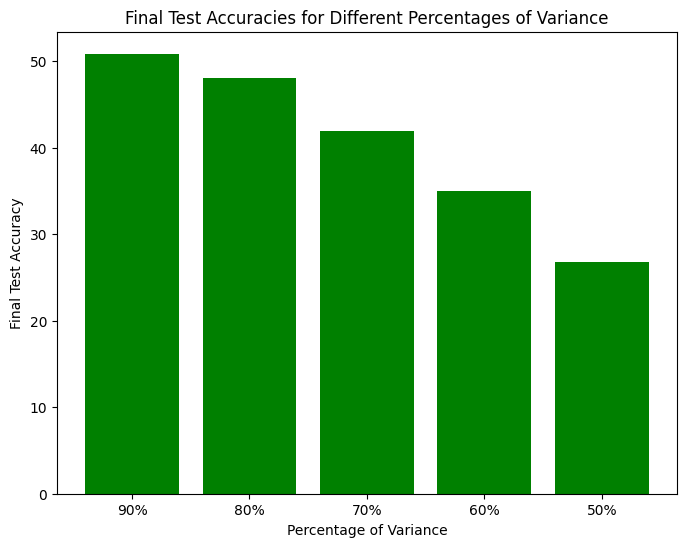

In [ ]:
# List of variance percentages
variance_percentages = [0.9, 0.8, 0.7, 0.6, 0.5]

# List of final test accuracies
test_accuracies = [test_accuracy_90, test_accuracy_80, test_accuracy_70, test_accuracy_60, test_accuracy_50]

# Print variance and corresponding final test accuracy
for variance, test_accuracy in [(0.9, test_accuracy_90), (0.8, test_accuracy_80), (0.7, test_accuracy_70), (0.6, test_accuracy_60), (0.5, test_accuracy_50)]:
    print(f"Variance {variance*100:.0f}% - Final Test Accuracy: {test_accuracy*100:.2f}%")


# Plot the final test accuracies for each percentage of variance
plt.figure(figsize=(8, 6))
plt.bar([f"{variance*100:.0f}%" for variance in variance_percentages], [test_accuracy*100 for test_accuracy in test_accuracies], color='green')
plt.title('Final Test Accuracies for Different Percentages of Variance')
plt.xlabel('Percentage of Variance')
plt.ylabel('Final Test Accuracy')
plt.show()